# **Импорт необходимых библиотек**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# **EDA и создание новых признаков**

Создадим новый признак, который позволит нам проверить, есть ли в датасете данные по нерабочим дням. В нерабочие дни торги на Московской бирже не проводятся, поэтому ненужные ячейки можно будет удалить.

In [ ]:
from pandas.tseries.offsets import CustomBusinessDay

cbd=CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')

In [ ]:
mmvb_df['Рабочий_день'] = mmvb_df['Дата'].dt.floor('D').isin(pd.date_range(start=mmvb_df['Дата'].min(), end=mmvb_df['Дата'].max(), freq=cbd))

In [ ]:
sber_mmvb_df = pd.merge(sber_df, mmvb_df, on='Дата')
df1 = pd.merge(sber_mmvb_df, usd_rub_df, on = 'Дата')
df = pd.merge(df1, x, on='Дата')
df.columns = ['Дата', 'Цена_СБ', 'Откр.СБ', 'Цена_ДР', 'Откр.ДР', 'Рабочий день', 'Цена_М', 'Откр.М', 'Ключевая ставка,%', 'Инфляция,%']
df

,Дата,Цена_СБ,Откр.СБ,Цена_ДР,Откр.ДР,Рабочий день,Цена_М,Откр.М,"Ключевая ставка,%","Инфляция,%"
0,2024-04-29,"308,97","309,14","3.478,08","3.468,92",True,"93,0000","92,3975",1600,784
1,2024-04-26,"309,00","308,50","3.449,77","3.446,39",True,"91,7200","91,9375",1600,784
2,2024-04-25,"308,41","307,95","3.439,76","3.429,62",True,"91,9375","92,2450",1600,784
3,2024-04-24,"307,94","307,50","3.428,93","3.438,45",True,"92,2450","93,1275",1600,784
4,2024-04-23,"307,39","315,39","3.439,42","3.483,26",True,"93,1275","93,4700",1600,784
...,...,...,...,...,...,...,...,...,...,...
305,2023-01-09,"142,40","141,83","2.163,50","2.163,43",True,"69,9900","72,1225",750,1177
306,2023-01-06,"141,40","141,39","2.156,39","2.157,32",True,"72,1225","72,1800",750,1177
307,2023-01-05,"141,27","141,60","2.156,67","2.170,40",True,"72,1800","72,0000",750,1177
308,2023-01-04,"141,43","141,85","2.168,42","2.171,54",True,"72,0000","71,1375",750,1177


In [ ]:
df['Цена_СБ'] = df['Цена_СБ'].map(correct_values,na_action = 'ignore')
df['Откр.СБ'] = df['Откр.СБ'].map(correct_values,na_action = 'ignore')
df['Цена_ДР'] = df['Цена_ДР'].map(correct_values,na_action = 'ignore')
df['Откр.ДР'] = df['Откр.ДР'].map(correct_values,na_action = 'ignore')
df['Цена_М'] = df['Цена_М'].map(correct_values,na_action = 'ignore')
df['Откр.М'] = df['Откр.М'].map(correct_values,na_action = 'ignore')
df

,Дата,Цена_СБ,Откр.СБ,Цена_ДР,Откр.ДР,Рабочий день,Цена_М,Откр.М,"Ключевая ставка,%","Инфляция,%"
0,2024-04-29,308.97,309.14,3478.08,3468.92,True,93.0000,92.3975,16.0,7.84
1,2024-04-26,309.00,308.50,3449.77,3446.39,True,91.7200,91.9375,16.0,7.84
2,2024-04-25,308.41,307.95,3439.76,3429.62,True,91.9375,92.2450,16.0,7.84
3,2024-04-24,307.94,307.50,3428.93,3438.45,True,92.2450,93.1275,16.0,7.84
4,2024-04-23,307.39,315.39,3439.42,3483.26,True,93.1275,93.4700,16.0,7.84
...,...,...,...,...,...,...,...,...,...,...
305,2023-01-09,142.40,141.83,2163.50,2163.43,True,69.9900,72.1225,7.5,11.77
306,2023-01-06,141.40,141.39,2156.39,2157.32,True,72.1225,72.1800,7.5,11.77
307,2023-01-05,141.27,141.60,2156.67,2170.40,True,72.1800,72.0000,7.5,11.77
308,2023-01-04,141.43,141.85,2168.42,2171.54,True,72.0000,71.1375,7.5,11.77


# **Описание переменных**
Дата - день календарного года

Цена_СБ - цена акций Сбербанка

Откр.СБ - цена открытия акций Сбербанка

Цена_ДР - валютный курс USD/RUB

Откр.ДР - цена открытия валютной пары USD/RUB

Рабочий день - boolean переменная, показывающая, являлась ли дата рабочим днем по российскому производственному календарю.

Цена_М - цена индекса IMOEX

Откр.М - цена открытия индекса IMOEX

Ключевая ставка, % - данные по размеру ключевой ставки (ставки рефинансирования) ЦБ РФ

Инфляция, % - данные по инфляции в РФ

Разделим переменные на категориальные и действительные. В качестве таргета примем цену акций Сбербанка: именно её мы будем предсказывать

In [ ]:
var_cat = [df['Дата'], df['Рабочий день']]
var_real = [df['Откр.СБ'], df['Цена_ДР'], df['Откр.ДР'],df['Цена_М'], df['Откр.М'], df['Ключевая ставка,%'], df['Инфляция,%']]
target = df['Цена_СБ']

Нарисуем гистограмму для целевого признака и посмотрим на его распределение

Text(0, 0.5, 'Частота')

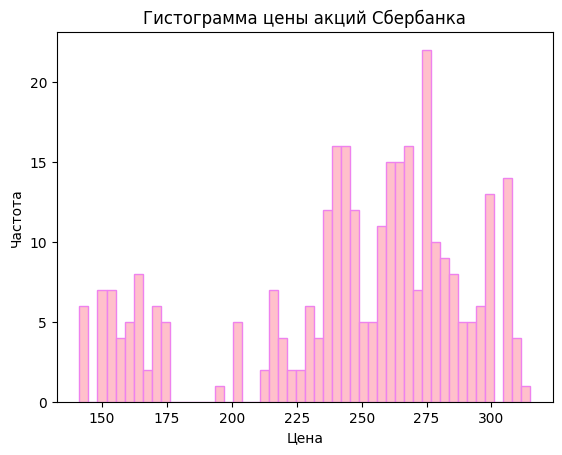

In [ ]:
plt.hist(target, color = 'pink', edgecolor = 'violet',
         bins = 50)
plt.title('Гистограмма цены акций Сбербанка')
plt.xlabel('Цена')
plt.ylabel('Частота')

Так как данные исторические, мы видим, что за 1.5 года наблюдался существенный рост цен акций. В дальнейшем мы определим, какими тенденциями в экономике сопровождался этот рост, чтобы модель могла предсказывать будущие цены с наиболее высокой точностью

Построим гистограммы для непрерывных признаков и оценим их распределение

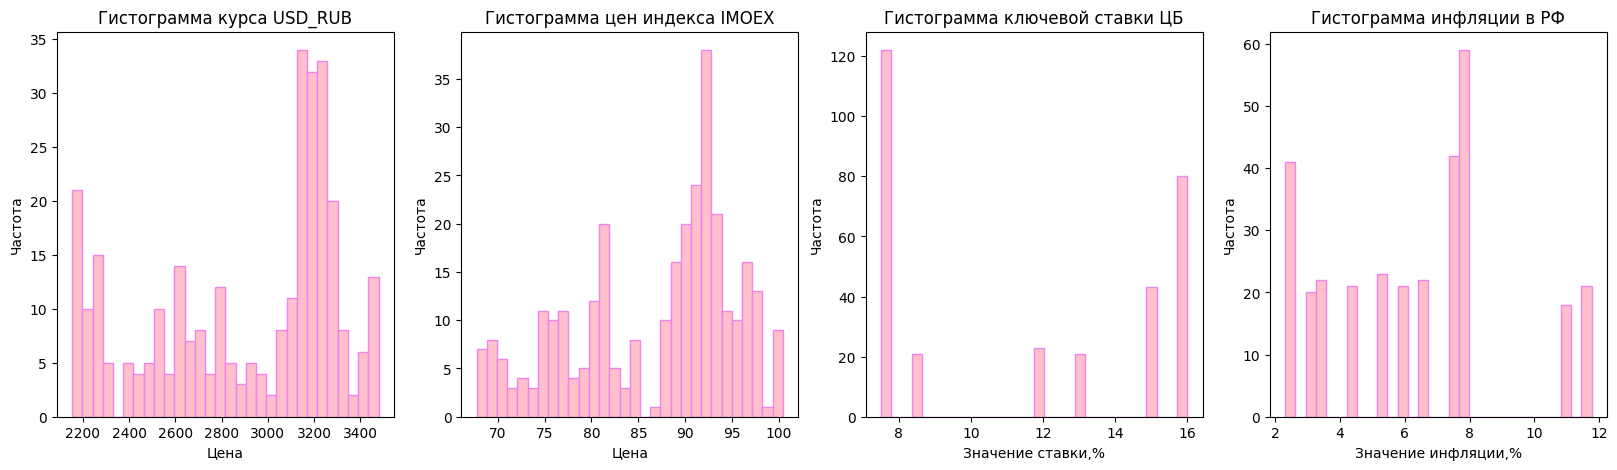

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].hist(df['Цена_ДР'], bins=30, color = 'pink', edgecolor = 'violet')
axs[0].set_title('Гистограмма курса USD_RUB')
axs[0].set_xlabel('Цена')
axs[0].set_ylabel('Частота')
axs[1].hist(df['Цена_М'], bins=30, color = 'pink', edgecolor = 'violet')
axs[1].set_title('Гистограмма цен индекса IMOEX')
axs[1].set_xlabel('Цена')
axs[1].set_ylabel('Частота')
axs[2].hist(df['Ключевая ставка,%'], bins=30, color = 'pink', edgecolor = 'violet')
axs[2].set_title('Гистограмма ключевой ставки ЦБ')
axs[2].set_xlabel('Значение ставки,%')
axs[2].set_ylabel('Частота')
axs[3].hist(df['Инфляция,%'], bins=30, color = 'pink', edgecolor = 'violet')
axs[3].set_title('Гистограмма инфляции в РФ')
axs[3].set_xlabel('Значение инфляции,%')
axs[3].set_ylabel('Частота')
plt.show()

В целом можно заметить, что распределения цен акций Сбербанка, индекса IMOEX и валютного курса USD/RUB имеют схожую форму, исходя из чего можем выдвинуть предположение об их положительной связи. Оценим ее с помощью построения облаков рассеяния, а на следующем этапе проверим гипотезу с помощью методов математической статистики

<Axes: xlabel='Откр.ДР', ylabel='Цена_СБ'>

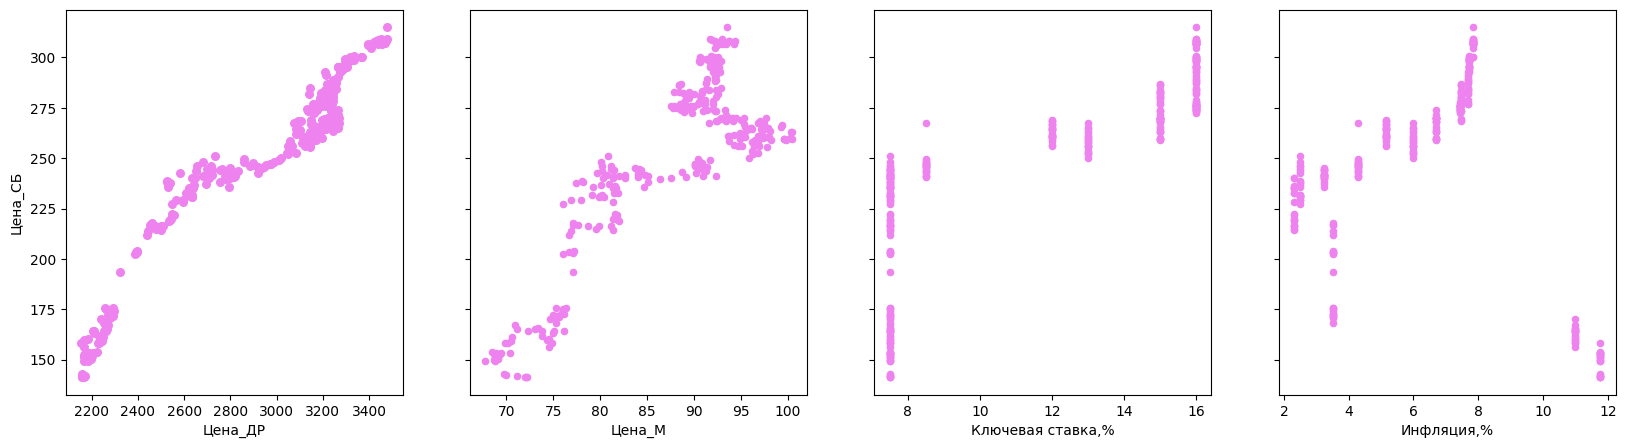

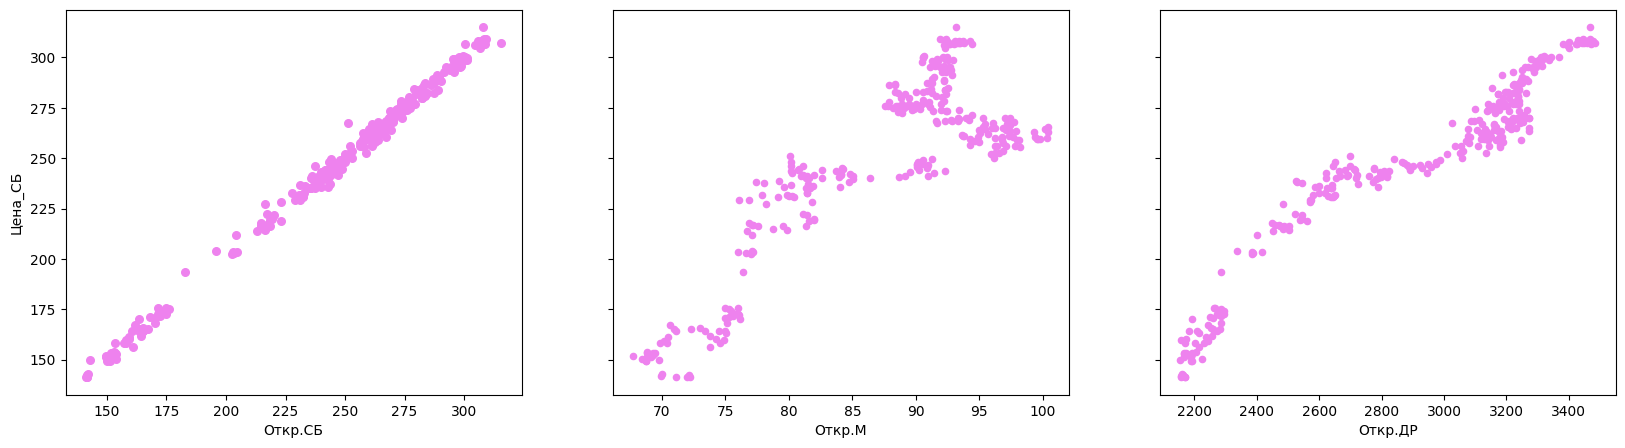

In [ ]:
fig, axs = plt.subplots(1, 4, sharey=True)

df.plot.scatter(x='Цена_ДР', y='Цена_СБ', ax=axs[0], figsize=(20, 5), s = 30, color = 'violet')
df.plot.scatter(x='Цена_М', y='Цена_СБ', ax=axs[1],color = 'violet')
df.plot.scatter(x='Ключевая ставка,%', y='Цена_СБ', ax=axs[2],color = 'violet')
df.plot.scatter(x='Инфляция,%', y='Цена_СБ', ax=axs[3],color = 'violet')

fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Откр.СБ', y='Цена_СБ', ax=axs[0], figsize=(20, 5), s = 30,color = 'violet')
df.plot(kind='scatter', x='Откр.М', y='Цена_СБ', ax=axs[1],color = 'violet')
df.plot(kind='scatter', x='Откр.ДР', y='Цена_СБ', ax=axs[2],color = 'violet')

**Вывод:**

Цены открытия коррелируют с таргетом примерно так же, как и основные цены, поэтому нет необходимости рассматривать их отдельно.

В целом, как и предполагалось, между ценами акций Сбербанка и ценами индекса IMOEX, а также валютным курсам наблюдается сильная положительная линейная связь. Однако лишь этого подтверждения мало для нашей модели, ведь исходя из наличия только лишь линейной связи нельзя судить о наличии каузативной связи.

По облакам рассеивания не можем судить о наличии связи между таргетом и ключевой ставкой, а также инфляцией, что, по своей сути, связано с распределением ключевой ставки и инфляции  - они принимали конечные значения и долгое время держались на одном уровне (обусловлено политикой ЦБ РФ: ключевая ставка не может меняться каждый день, ей присваивается определенное значение на заседаниях СД и она повышается/понижается исходя из рыночной конъюнктуры). Аналогично можно рассуждать и насчет инфляции, ЦБ таргетирует её и старается снижать либо поддерживать на одном уровне (цель - 4%)

Оценим взаимосвязь наших количественных переменных друг с другом с помощью построения корреляционной матрицы

                     Цена_М   Цена_ДР  Ключевая ставка,%  Инфляция,%
Цена_М             1.000000  0.917954           0.755549   -0.135969
Цена_ДР            0.917954  1.000000           0.888322   -0.007035
Ключевая ставка,%  0.755549  0.888322           1.000000    0.330190
Инфляция,%        -0.135969 -0.007035           0.330190    1.000000


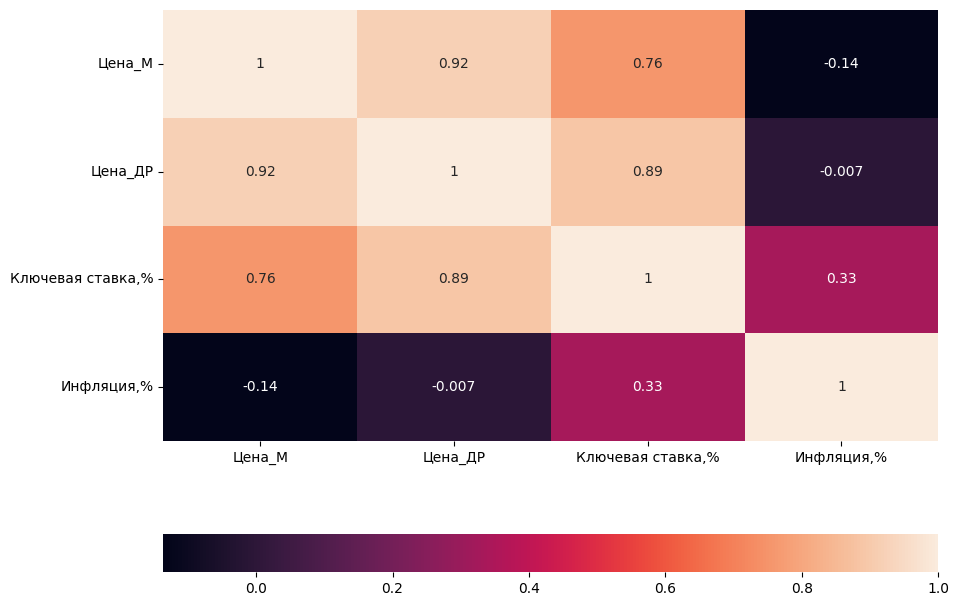

In [ ]:
corr_m = df[['Цена_М', 'Цена_ДР', 'Ключевая ставка,%', 'Инфляция,%']].corr()
print(corr_m)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_m, annot=True,cbar_kws= {'orientation': 'horizontal'})
plt.show()

**Вывод:**

Цены индекса IMOEX и валютного курса имеют сильную положительную линейную связь. Это можно объяснить: когда растет курс USD/RUB, то рубль укрепляется по отношению к доллрау, следовательно, и рынок отыгрывает данный факт, а индекс Московской Биржи является неким бенчмарком, поскольку включает в себя ТОП-акции из первого эшелона.

Также сильно коррелируют между собой эти цены и ключевая ставка, что интересно: в теории, связь между индексом IMOEX и ставкой должна быть обратной, ведь рост ставки влечет за собой более высокую доходность по облигациям и депозитам, и инвесторы перекладывают часть капитала туда. Однако на практике, рост ставки сказывается негативно не на всех отраслях, а, например, на экспортерах. Индекс МБ включает в себя различные компании, он и создан для диверсификации портфеля, потому, скорее всего, мы видим тут положительную линейную связь.

С валютным курсом эта связь легко объяснима: при повышении ключевой ставки он начинает расти, так как инвесторы ожидают роста инфляции и потери рублем своей покупательной способности, а значит, готовы отдать больше рублей за 1 доллар сейчас, нежели в дальнейшем потерять ценность своих сбережений (достаточно вспомнить не столь давний кейс, когда курс перешагнул порог в 100 рублей за 1 доллар, ведь каждый стремился "не потерять" деньги.

*Примечание: в качестве валютного курса USD/RUB у нас рассматривается, на самом деле, обратный курс: то есть сколько рублей мы готовы отдать за 1 доллар. Это обозначение не совсем корректное, однако именно оно используется в большинстве источников*



А вот с инфляцией у них наблюдается пусть и слабая, но отрицательная линейная связь, ведь когда в стране растет инфляция, то растут цены, а значит, что капитал перетекает с финансового рынка, так как покупательная способность в стране снижается.


Создадим новую переменную - день недели. Поскольку торги на Московской Бирже проодятся с понедельника по пятницу, то в первый и последний день цены акций могут быть несправедливыми. В частности, чаще всего в пятницу цены терпят падение, а на открытии торгов в понедельник могут существенно меняться за счет новостей, появившихся на выходных и ещё не отыгранных рынком.



*   0: понедельник
*   1: вторник

*   2: среда
*   3: четверг

*   4: пятница
*   5: суббота


*   6: воскресенье











In [ ]:
df['День недели'] = df['Дата'].dt.weekday
df.head()

,Дата,Цена_СБ,Откр.СБ,Цена_ДР,Откр.ДР,Рабочий день,Цена_М,Откр.М,"Ключевая ставка,%","Инфляция,%",День недели
0,2024-04-29,308.97,309.14,3478.08,3468.92,True,93.0000,92.3975,16.0,7.84,0
1,2024-04-26,309.00,308.50,3449.77,3446.39,True,91.7200,91.9375,16.0,7.84,4
2,2024-04-25,308.41,307.95,3439.76,3429.62,True,91.9375,92.2450,16.0,7.84,3
3,2024-04-24,307.94,307.50,3428.93,3438.45,True,92.2450,93.1275,16.0,7.84,2
4,2024-04-23,307.39,315.39,3439.42,3483.26,True,93.1275,93.4700,16.0,7.84,1


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6790: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


Text(0, 0.5, 'Частота')

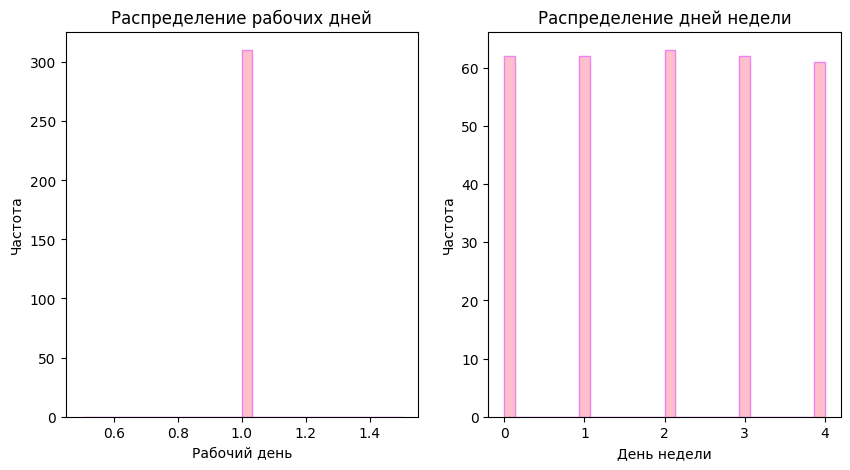

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df['Рабочий день'], bins=30, color = 'pink', edgecolor = 'violet')
axs[0].set_title('Распределение рабочих дней')
axs[0].set_xlabel('Рабочий день')
axs[0].set_ylabel('Частота')
axs[1].hist(df['День недели'], bins=30, color = 'pink', edgecolor = 'violet')
axs[1].set_title('Распределение дней недели')
axs[1].set_xlabel('День недели')
axs[1].set_ylabel('Частота')

Добавим ещё одну переменную - номер месяца, чтобы в дальнейшим определить окончание квартала. В этот период компании публикуют ежеквартальные отчёты, которые влияют на мнение инвесторов о покупке/продаже ценных бумаг, что, естественно, сказывается на стоимости акций. Посмотрим, как ежеквартальные отчеты Сбербанка влияют на цену его акций.

In [ ]:
df['Месяц'] = df['Дата'].dt.month
df

,Дата,Цена_СБ,Откр.СБ,Цена_ДР,Откр.ДР,Рабочий день,Цена_М,Откр.М,"Ключевая ставка,%","Инфляция,%",День недели,Месяц
0,2024-04-29,308.97,309.14,3478.08,3468.92,True,93.0000,92.3975,16.0,7.84,0,4
1,2024-04-26,309.00,308.50,3449.77,3446.39,True,91.7200,91.9375,16.0,7.84,4,4
2,2024-04-25,308.41,307.95,3439.76,3429.62,True,91.9375,92.2450,16.0,7.84,3,4
3,2024-04-24,307.94,307.50,3428.93,3438.45,True,92.2450,93.1275,16.0,7.84,2,4
4,2024-04-23,307.39,315.39,3439.42,3483.26,True,93.1275,93.4700,16.0,7.84,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
305,2023-01-09,142.40,141.83,2163.50,2163.43,True,69.9900,72.1225,7.5,11.77,0,1
306,2023-01-06,141.40,141.39,2156.39,2157.32,True,72.1225,72.1800,7.5,11.77,4,1
307,2023-01-05,141.27,141.60,2156.67,2170.40,True,72.1800,72.0000,7.5,11.77,3,1
308,2023-01-04,141.43,141.85,2168.42,2171.54,True,72.0000,71.1375,7.5,11.77,2,1


Теперь добавим boolean признак is_quarter_end, потому что он будет полезным для обучения модели. На этапе тестирования гипотез мы проверим выдвинутое предположение.

In [ ]:
df['is_quarter_end'] = np.where(df['Месяц']%3==0,1,0)
df.head()

,Дата,Цена_СБ,Откр.СБ,Цена_ДР,Откр.ДР,Рабочий день,Цена_М,Откр.М,"Ключевая ставка,%","Инфляция,%",День недели,Месяц,is_quarter_end
0,2024-04-29,308.97,309.14,3478.08,3468.92,True,93.0000,92.3975,16.0,7.84,0,4,0
1,2024-04-26,309.00,308.50,3449.77,3446.39,True,91.7200,91.9375,16.0,7.84,4,4,0
2,2024-04-25,308.41,307.95,3439.76,3429.62,True,91.9375,92.2450,16.0,7.84,3,4,0
3,2024-04-24,307.94,307.50,3428.93,3438.45,True,92.2450,93.1275,16.0,7.84,2,4,0
4,2024-04-23,307.39,315.39,3439.42,3483.26,True,93.1275,93.4700,16.0,7.84,1,4,0


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6790: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


Text(0, 0.5, 'Частота')

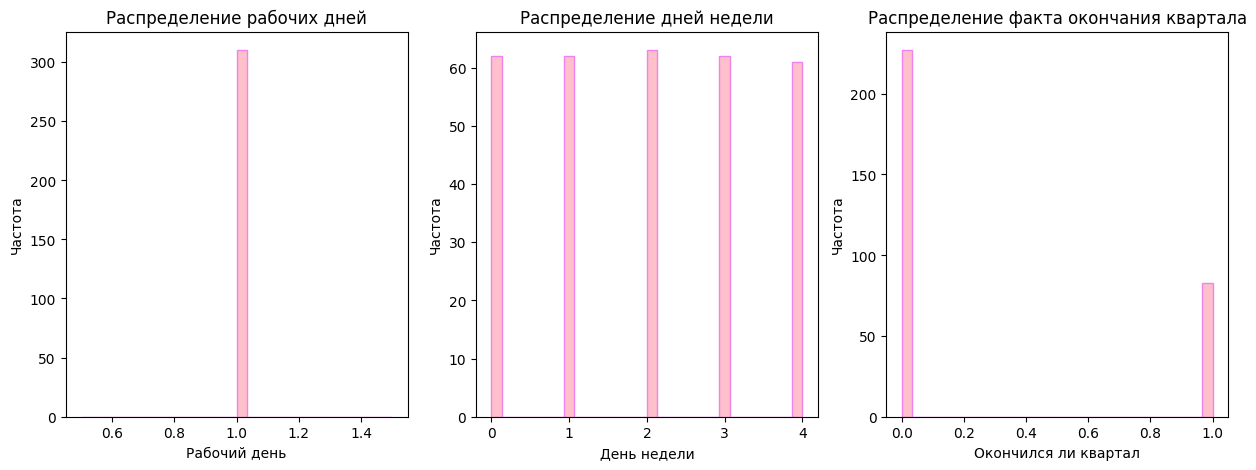

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(df['Рабочий день'], bins=30, color = 'pink', edgecolor = 'violet')
axs[0].set_title('Распределение рабочих дней')
axs[0].set_xlabel('Рабочий день')
axs[0].set_ylabel('Частота')
axs[1].hist(df['День недели'], bins=30, color = 'pink', edgecolor = 'violet')
axs[1].set_title('Распределение дней недели')
axs[1].set_xlabel('День недели')
axs[1].set_ylabel('Частота')
axs[2].hist(df['is_quarter_end'], bins=30, color = 'pink', edgecolor = 'violet')
axs[2].set_title('Распределение факта окончания квартала')
axs[2].set_xlabel('Окончился ли квартал')
axs[2].set_ylabel('Частота')

Итак, в наших данных нет значений по нерабочим дням, значит, что этот признак нам в целом не потребуется.

Дни недели распределены равномерно, следовательно,сможем проверять гипотезу о несправделивости цен в понедельник и пятницу.

В данных больше дат по месяцам, которые не являются окончанием квартала, что логично: квартал заканчивается в марте, июне, сентябре и декабре. Таким образом, 4 месяца против 8